# Fuel Emissions Data Analysis

This is our analysis of the Fuel Emissions Data set from the EPA...

In [44]:
import pandas as pd
data = pd.read_csv('/Users/sydneypeno/Downloads/Uncleaned_emissions_data.csv', low_memory=False)

Basic statstics of our data:

In [45]:
data.describe()

,Facility Id,FRS Id,Primary NAICS Code,Reporting Year,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
count,2.769600e+05,2.514420e+05,276960.000000,276960.000000,276960.000000,276960.000000
mean,1.004472e+06,1.099870e+11,335091.370989,2015.779986,174.584798,366.027955
std,3.185299e+03,2.034538e+09,144539.968299,3.171391,1091.264286,2155.247132
min,1.000001e+06,7.878000e+03,111419.000000,2010.000000,0.000000,0.000000
25%,1.001495e+06,1.100016e+11,221112.000000,2013.000000,0.000000,0.000000
50%,1.004233e+06,1.100309e+11,322121.000000,2016.000000,2.000000,2.980000
75%,1.006873e+06,1.100438e+11,331492.000000,2019.000000,21.250000,28.310000
max,1.014434e+06,1.100440e+11,928110.000000,2021.000000,51300.250000,141043.400000


Using a correlation plot to identify any similiarities amongst the variables within the data

/var/folders/y9/t9s6xp2s1zd4sgrgn98sqzp80000gn/T/ipykernel_33652/3086534269.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


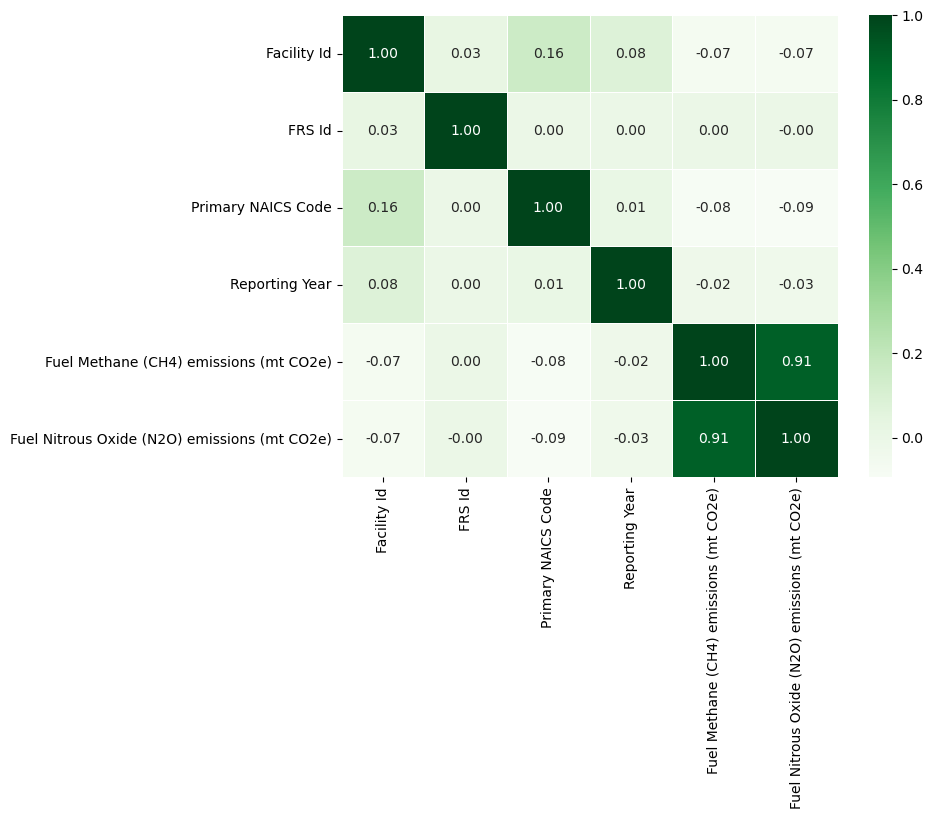

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

We can observe that there is insufficient data coming from the reporting year of 2010 by the lack of data points.

In [47]:
#data points per year 
df1 = data.groupby('Reporting Year').size().reset_index(name='count')
print(df1)

    Reporting Year  count
0             2010    631
1             2011  27183
2             2012  27511
3             2013  27244
4             2014  26707
5             2015  25971
6             2016  24393
7             2017  23864
8             2018  23724
9             2019  23433
10            2020  23179
11            2021  23120


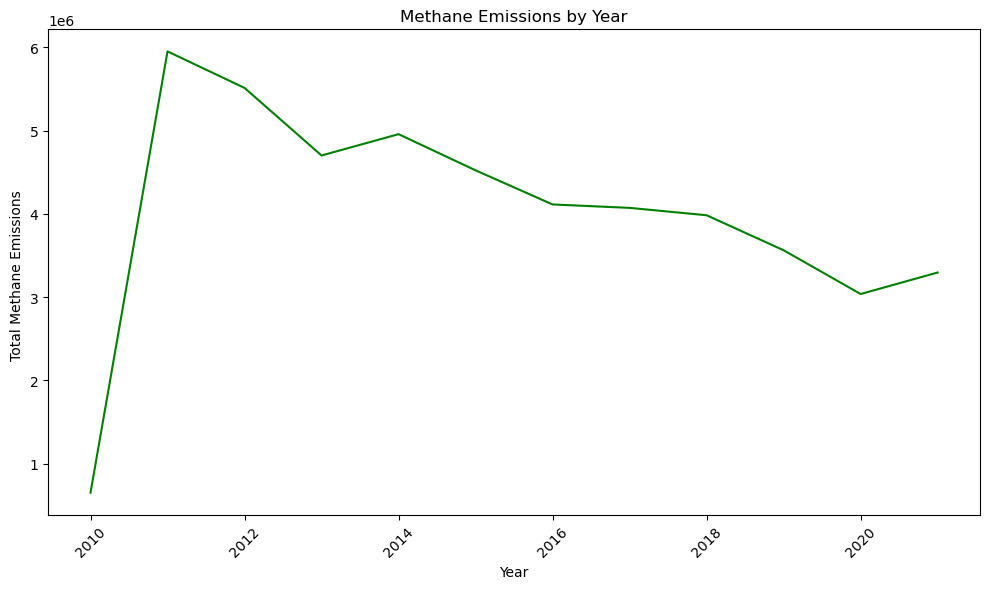

In [48]:
#Methane emissions by year
methaneYear=data.groupby('Reporting Year')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
methaneYear.columns = ['Year', 'Total methane Emissions']

import matplotlib.pyplot as plt

#visualization
plt.figure(figsize=(10, 6))
plt.plot(methaneYear['Year'], methaneYear['Total methane Emissions'], color='green')
plt.xlabel('Year')
plt.ylabel('Total Methane Emissions ')
plt.title('Methane Emissions by Year')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [49]:
# Drop 2010 from data
data = data[data['Reporting Year'] != 2010]

Now we can group the data points by reporting year and cacluatle the mean emissions for each reporting year.

In [6]:
yearly_mean_methane = data.groupby("Reporting Year")["Fuel Methane (CH4) emissions (mt CO2e)"].mean()
print(yearly_mean_methane)


yearly_mean_n2o = data.groupby("Reporting Year")["Fuel Nitrous Oxide (N2O) emissions (mt CO2e)"].mean()
print(yearly_mean_n2o)

industry_mode = data["Industry Type (sectors)"].mode()
fuel_mode = data["General Fuel Type"].mode()
state_mode = data["State"].mode()

print(industry_mode) #power plants
print(fuel_mode) #natural gas
print(state_mode) #Texas 

Reporting Year
2011    218.893956
2012    200.347748
2013    172.519839
2014    185.584200
2015    174.123636
2016    168.586657
2017    170.603739
2018    167.874919
2019    152.024190
2020    131.024428
2021    142.517618
Name: Fuel Methane (CH4) emissions (mt CO2e), dtype: float64
Reporting Year
2011    456.845597
2012    421.220639
2013    386.826827
2014    391.360354
2015    360.210630
2016    358.014010
2017    355.035904
2018    347.268557
2019    310.242406
2020    267.361731
2021    294.578504
Name: Fuel Nitrous Oxide (N2O) emissions (mt CO2e), dtype: float64
0    Power Plants
Name: Industry Type (sectors), dtype: object
0    Natural Gas
Name: General Fuel Type, dtype: object
0    TX
Name: State, dtype: object


Now, we can normalize the data by performing min-max scaling on the continuous, numeric variables.

In [7]:
df_reportYr = pd.DataFrame(data["Reporting Year"]) #make year its own dataframe so the year will not be normalized
df_State = pd.DataFrame(data["State"])
df_industry = pd.DataFrame(data["Industry Type (sectors)"])

dfClean_maxScaled = data.copy() 
dfClean_maxScaled.drop(["State", "General Fuel Type", "Industry Type (sectors)", "Reporting Year"], 
                       axis=1, inplace=True) #drop year and non numeric columns

dfClean_maxScaled = dfClean_maxScaled.apply(pd.to_numeric, errors='coerce') #convert the remaining columns to numeric, 
                                                                            #and et errors='coerce' to handle non-numeric values by converting them to NaN.

for column in dfClean_maxScaled.columns:
    dfClean_maxScaled[column] = dfClean_maxScaled[column]  / dfClean_maxScaled[column].abs().max() #normalize data

dfClean_maxScaled = pd.concat([df_reportYr, dfClean_maxScaled], axis=1) #add reporting year back in 
dfClean_maxScaled = pd.concat([df_State, dfClean_maxScaled], axis=1) 
dfClean_maxScaled = pd.concat([df_industry, dfClean_maxScaled], axis=1)

dfClean_minMax = data.copy()

dfClean_minMax.drop(["State", "General Fuel Type", "Industry Type (sectors)", "Reporting Year"], axis=1, inplace=True)
dfClean_minMax = dfClean_minMax.apply(pd.to_numeric, errors='coerce')

for column in dfClean_minMax.columns:
    dfClean_minMax[column] = (dfClean_minMax[column] - dfClean_minMax[column].min()) / (dfClean_minMax[column].max() - dfClean_minMax[column].min())   
    

dfClean_minMax = pd.concat([df_reportYr, dfClean_minMax], axis=1) #add reporting year back in 
dfClean_minMax = pd.concat([df_State, dfClean_minMax], axis=1)  
dfClean_minMax = pd.concat([df_industry, dfClean_minMax], axis=1)

Now we can view which states have the most emissions

In [8]:
#top 15 states for NO2 emissions
topNO2states=dfClean_minMax.groupby('State')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
topNO2states.columns = ['State', 'Total NO2 Emissions']
topNO2states = topNO2states.sort_values(by='Total NO2 Emissions', ascending=False)
print(topNO2states.head(15))

total_emissions = dfClean_minMax['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum()
print(total_emissions)

   State  Total NO2 Emissions
45    TX            75.146794
16    IN            34.249029
15    IL            30.906925
36    OH            30.598659
18    KY            30.472857
9     FL            30.205036
39    PA            29.854970
1     AL            25.717323
52    WV            25.534076
25    MO            25.144511
10    GA            23.997998
23    MI            22.780412
19    LA            22.166625
28    NC            19.683106
53    WY            18.210666
709.5290586820107


In [9]:
#top 15 states for Methane emissions
topCH4states=dfClean_minMax.groupby('State')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
topCH4states.columns = ['State', 'Total methane Emissions']
topCH4states = topCH4states.sort_values(by='Total methane Emissions', ascending=False)
print(topCH4states.head(15))

   State  Total methane Emissions
45    TX                93.286876
16    IN                49.387234
9     FL                48.350430
15    IL                47.651398
18    KY                40.134904
36    OH                39.866423
39    PA                37.794172
1     AL                35.726988
10    GA                34.170541
28    NC                29.275046
19    LA                27.239986
52    WV                26.452548
53    WY                26.180521
23    MI                25.909680
25    MO                23.883936


Visualization showing the total emissions in the US by year

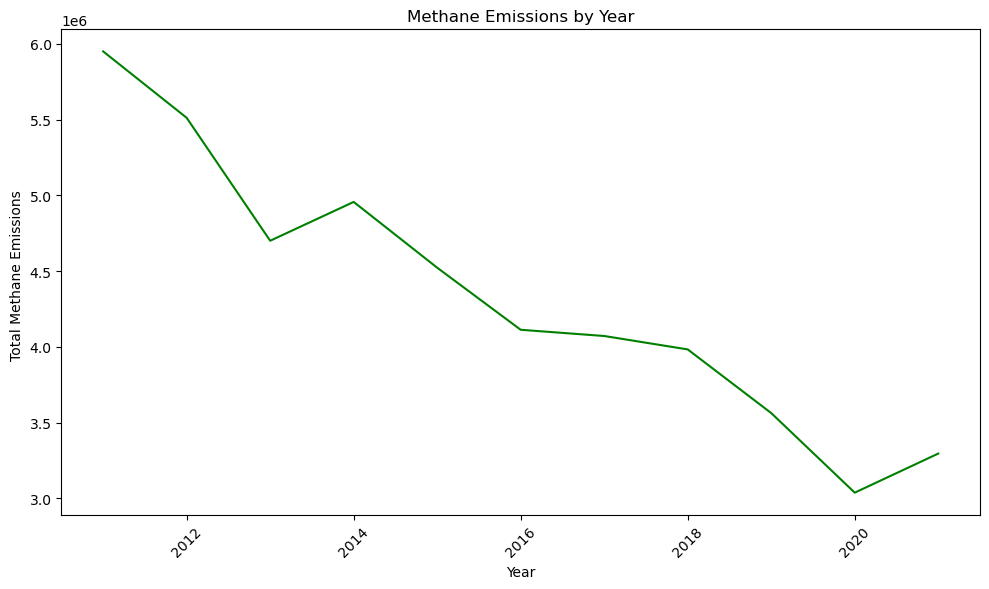

In [50]:
#Methane emissions by year
methaneYear=data.groupby('Reporting Year')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
methaneYear.columns = ['Year', 'Total methane Emissions']
#Dropped 2010 because data is not representative of full year (missing data)

import matplotlib.pyplot as plt

#visualization
plt.figure(figsize=(10, 6))
plt.plot(methaneYear['Year'], methaneYear['Total methane Emissions'], color='green')
plt.xlabel('Year')
plt.ylabel('Total Methane Emissions ')
plt.title('Methane Emissions by Year')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

    Year  Total no2 Emissions
0   2011         1.241843e+07
1   2012         1.158820e+07
2   2013         1.053871e+07
3   2014         1.045206e+07
4   2015         9.355030e+06
5   2016         8.733036e+06
6   2017         8.472577e+06
7   2018         8.238599e+06
8   2019         7.269910e+06
9   2020         6.197178e+06
10  2021         6.810655e+06


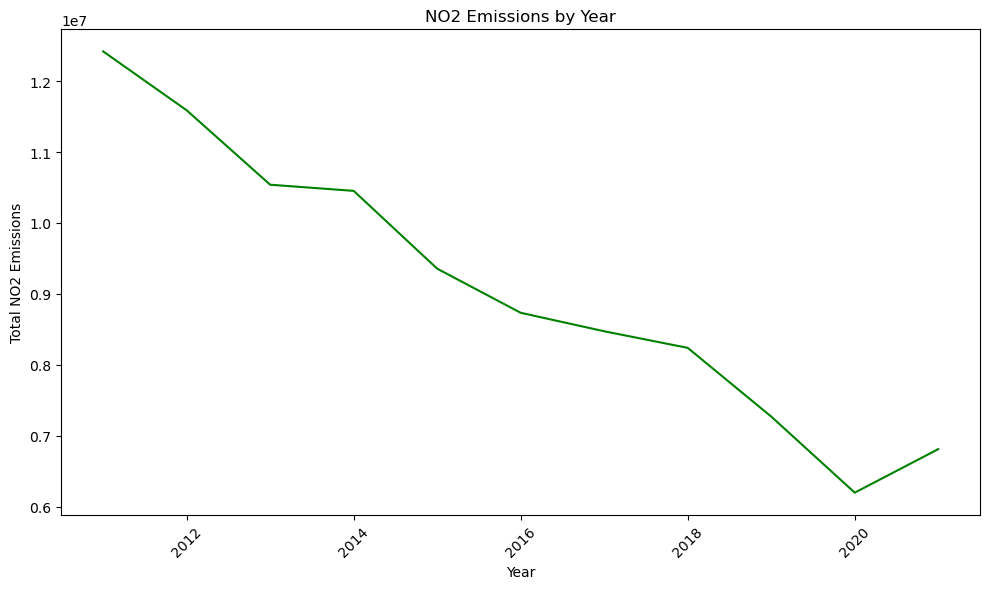

In [51]:
#NO2 emissions by year
NO2Year=data.groupby('Reporting Year')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
NO2Year.columns = ['Year', 'Total no2 Emissions']
print(NO2Year.head(15))


#Visualization
plt.figure(figsize=(10, 6))
plt.plot(NO2Year['Year'], NO2Year['Total no2 Emissions'], color='green')
plt.xlabel('Year')
plt.ylabel('Total NO2 Emissions')
plt.title('NO2 Emissions by Year')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

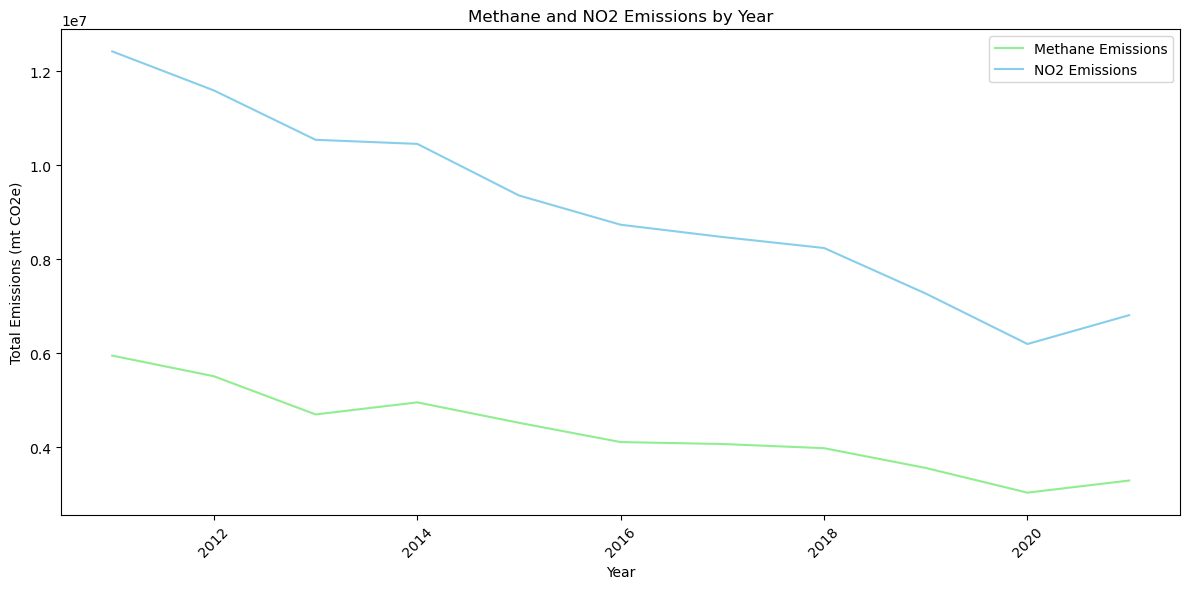

In [52]:
# Plot both on same graph 

import matplotlib.pyplot as plt

# Methane emissions by year
methaneYear=data.groupby('Reporting Year')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
methaneYear.columns = ['Year', 'Total methane Emissions']


#NO2 emissions by year
NO2Year=data.groupby('Reporting Year')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
NO2Year.columns = ['Year', 'Total no2 Emissions']


# Visualization
plt.figure(figsize=(12, 6))
plt.plot(methaneYear['Year'], methaneYear['Total methane Emissions'], color='lightgreen', label='Methane Emissions')
plt.plot(NO2Year['Year'], NO2Year['Total no2 Emissions'], color='skyblue', label='NO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Total Emissions (mt CO2e)')
plt.title('Methane and NO2 Emissions by Year')
plt.xticks(rotation=45)
plt.legend()  

plt.tight_layout()
plt.show()

Now we can observe the emission by industry

In [5]:
#top 3 industries for Methane emissions
df10=data.groupby('Industry Type (sectors)')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
df10.columns = ['Industry', 'Total methane Emissions']
df10 = df10.sort_values(by='Total methane Emissions', ascending=False)
print(df10)

df11=data.groupby('Industry Type (sectors)')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
df11.columns = ['Industry', 'Total N2O Emissions']
df11 = df11.sort_values(by='Total N2O Emissions', ascending=False)
print(df11)



                                             Industry  Total methane Emissions
60                                       Power Plants             3.388683e+07
69                                              Waste             2.428658e+06
67                              Pulp and Paper, Waste             2.404640e+06
63                                Power Plants, Waste             1.163265e+06
64                                     Pulp and Paper             9.179735e+05
..                                                ...                      ...
46           Other, Petroleum and Natural Gas Systems             1.377500e+02
4          Chemicals, Industrial Gas Suppliers, Waste             1.085000e+02
26                    Industrial Gas Suppliers, Other             7.200000e+01
39  Natural Gas and Natural Gas Liquids Suppliers,...             4.450000e+01
24  Import and Export of Equipment Containing Fluo...             2.250000e+00

[70 rows x 2 columns]
                             

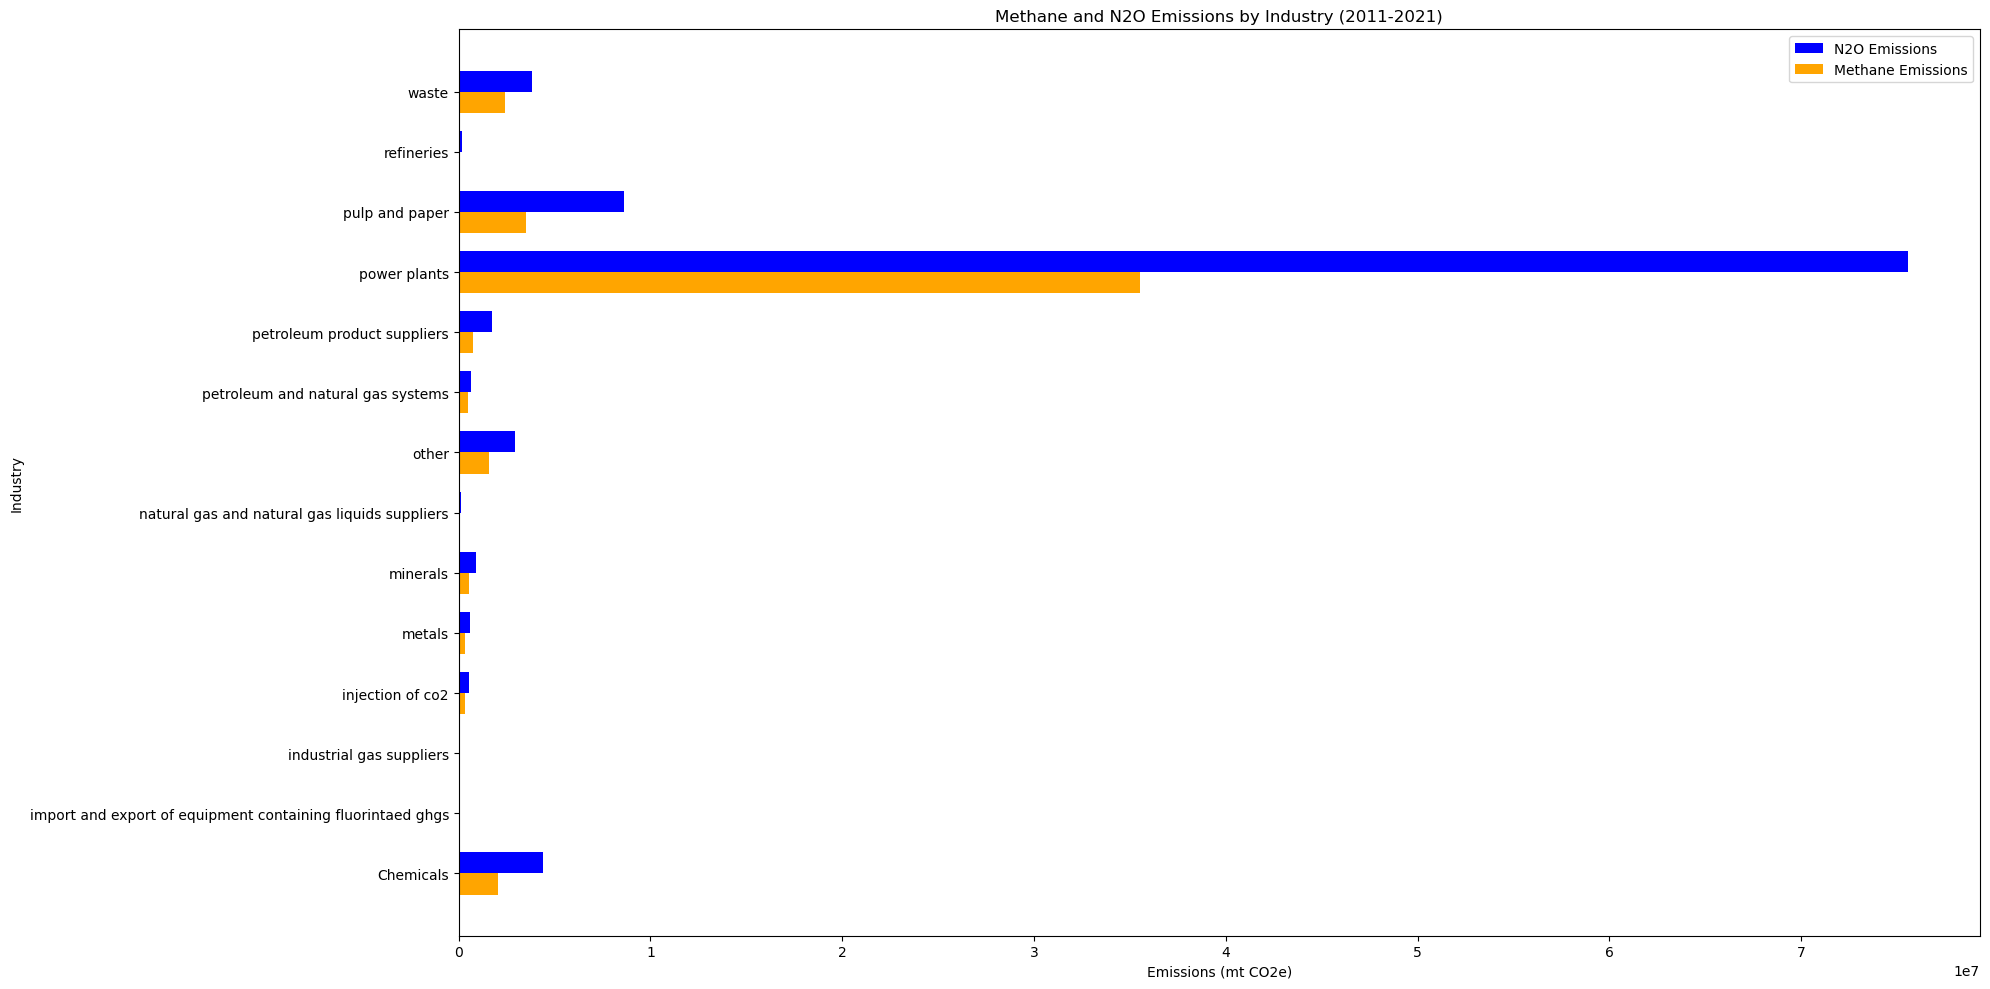

In [27]:
# Visualize the industry

import matplotlib.pyplot as plt
import numpy as np

# Preprocessing step to merge and standardize industry names
df_merged = df10.merge(df11, on='Industry', how='inner')

# Preprocessing 'Industry' column to standardize labels
df_merged['Industry'] = df_merged['Industry'].astype(str).apply(lambda x: x.split(',')[0].strip() if ',' in x else x)
# Standardize industry names
df_merged['Industry'] = df_merged['Industry'].apply(lambda x: x.strip().lower())

# Combine variations of "Chemicals" into a single category
df_merged.loc[df_merged['Industry'].str.contains('chemicals'), 'Industry'] = 'Chemicals'


# Aggregate emissions data by industry
df_aggregated = df_merged.groupby('Industry').agg({'Total N2O Emissions': 'sum', 'Total methane Emissions': 'sum'}).reset_index()

plt.figure(figsize=(20, 10))

# Create an array of indices for the industries
industries = np.arange(len(df_aggregated))

# Width of the bars
bar_width = 0.35

# Create bar for NO2 emissions
plt.barh(industries + bar_width/2, df_aggregated['Total N2O Emissions'], bar_width, label='N2O Emissions', color='blue')
# Create bar for methane emissions
plt.barh(industries - bar_width/2, df_aggregated['Total methane Emissions'], bar_width, label='Methane Emissions', color='orange')

# Set the industry names as y-ticks
plt.yticks(industries, df_aggregated['Industry'])

# Add labels and title
plt.xlabel('Emissions (mt CO2e)')
plt.ylabel('Industry')
plt.title('Methane and N2O Emissions by Industry (2011-2021)')

# Add a legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

In [6]:
# Step 1: Calculate total emissions
total_emissions = df10['Total methane Emissions'].sum()

# Step 2: Filter dataframe for power plant industry
power_plant_emissions = df10[df10['Industry'] == 'Power Plants']['Total methane Emissions'].values[0]

# Step 3: Calculate percentage
percentage_power_plant_emissions = (power_plant_emissions / total_emissions) * 100

print(f"Power Plant Emissions as a percentage of Total Methane Emissions: {percentage_power_plant_emissions:.2f}%")

Power Plant Emissions as a percentage of Total Methane Emissions: 71.04%


In [7]:
# Step 1: Calculate total emissions
total_emissions = df11['Total N2O Emissions'].sum()

# Step 2: Filter dataframe for power plant industry
power_plant_emissions = df11[df11['Industry'] == 'Power Plants']['Total N2O Emissions'].values[0]

# Step 3: Calculate percentage
percentage_power_plant_emissions = (power_plant_emissions / total_emissions) * 100

print(f"Power Plant Emissions as a percentage of Total N20 Emissions: {percentage_power_plant_emissions:.2f}%")

Power Plant Emissions as a percentage of Total N20 Emissions: 72.61%


As we can see, the power plants industry produces more emissions than any other industry. We can focus on strictly the power plant industry sector.

In [8]:
# Filtering the DataFrame to only include powerplants
ppdf = data[data['Industry Type (sectors)'] == 'Power Plants']

We can observe the highest emitting power plant facilities in the US:

In [22]:
facility_sums = ppdf.groupby(['Facility Name', 'City', 'State']).agg({
    'Fuel Methane (CH4) emissions (mt CO2e)': 'sum',
    'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)': 'sum'
}).reset_index()

grouped_data = ppdf.groupby(['Facility Name', 'City', 'State']).agg({
    'Fuel Methane (CH4) emissions (mt CO2e)': ['sum', 'mean'],
    'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)': ['sum', 'mean']
}).reset_index()

print(grouped_data.head)

<bound method NDFrame.head of                      Facility Name          City State  \
                                                         
0                     23rd and 3rd      BROOKLYN    NY   
1      48th Street Peaking Station       HOLLAND    MI   
2                      59th Street      NEW YORK    NY   
3                      74th Street      NEW YORK    NY   
4     A B Brown Generating Station  MOUNT VERNON    IN   
...                            ...           ...   ...   
1802       Yuba City Energy Center     YUBA CITY    CA   
1803             Yucca Power Plant          YUMA    AZ   
1804    Zeeland Generating Station       ZEELAND    MI   
1805            Zion Energy Center          ZION    IL   
1806                          Zuni        DENVER    CO   

     Fuel Methane (CH4) emissions (mt CO2e)               \
                                        sum         mean   
0                                    337.25     7.664773   
1                                  

In [30]:
average_methane = facility_sums['Fuel Methane (CH4) emissions (mt CO2e)'].mean()
average_n2o = facility_sums['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].mean()

print(average_methane)
print(average_n2o)

18878.45916481533
40481.69615835096


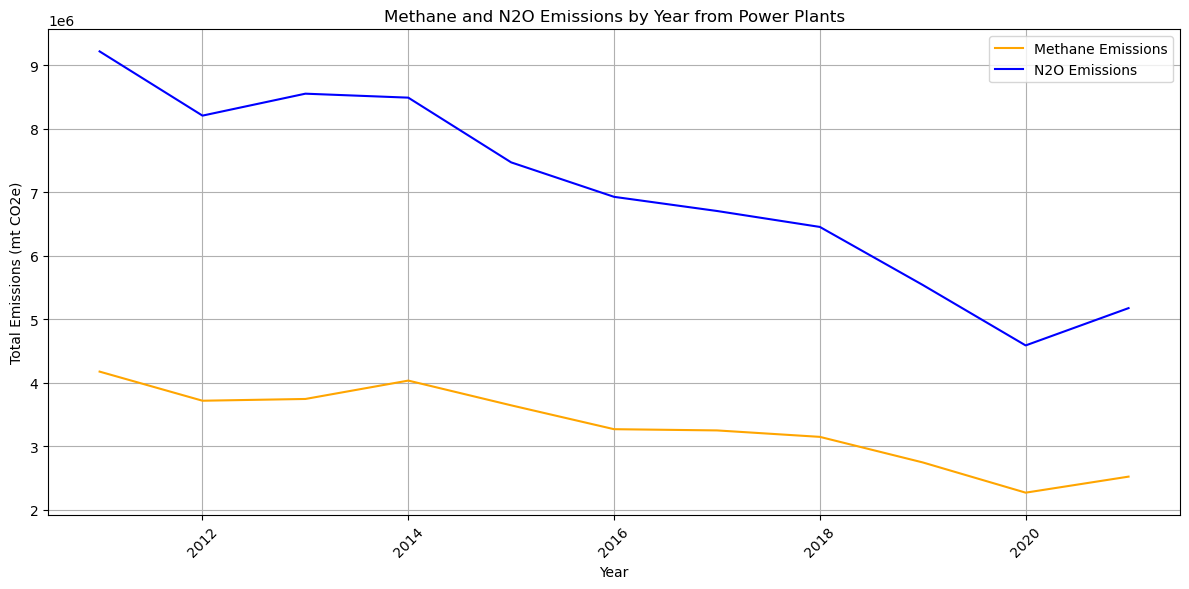

In [8]:
# EMISSIONS PER YEAR FROM POWER PLANTS
# Methane emissions by year
dff = ppdf.groupby('Reporting Year')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
dff.columns = ['Year', 'Total Methane Emissions']
# Drop 2010 because data is not representative of the full year (missing data)
dff = dff[dff['Year'] != 2010]

# NO2 emissions by year
dfff = ppdf.groupby('Reporting Year')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
dfff.columns = ['Year', 'Total NO2 Emissions']


# Visualization
plt.figure(figsize=(12, 6))
plt.plot(dff['Year'], dff['Total Methane Emissions'], color='orange', label='Methane Emissions')
plt.plot(dfff['Year'], dfff['Total NO2 Emissions'], color='blue', label='N2O Emissions')
plt.xlabel('Year')
plt.ylabel('Total Emissions (mt CO2e)')
plt.title('Methane and N2O Emissions by Year from Power Plants')
plt.xticks(rotation=45)
plt.legend()  
plt.grid(True)

plt.tight_layout()
plt.show()

We can oberve emissions around the US by utilizing emissions maps:

In [32]:
import geopandas as gpd
import pandas as pd

# Load the shapefile
us_states = gpd.read_file("/Users/sydneypeno/Downloads/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")

#US States methane emissions
df12=ppdf.groupby('State')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
df12.columns = ['State', 'Total methane Emissions']


merged_data = us_states.merge(df12, left_on="STUSPS", right_on="State", how="left")

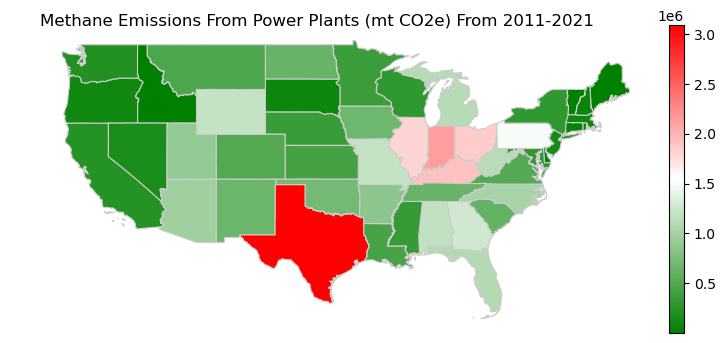

In [33]:
#plot
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

minx, miny, maxx, maxy = -130, 24, -67, 50

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_title("Methane Emissions From Power Plants (mt CO2e) From 2011-2021 ")

ax.set_axis_off()

c1map= LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256) 
merged_data.plot(column="Total methane Emissions", cmap=c1map, linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()

In [34]:
# US State N2O emissions

df13=ppdf.groupby('State')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
df13.columns = ['State', 'Total NO2 Emissions']

merged_data2 = us_states.merge(df13, left_on="STUSPS", right_on="State", how="left")

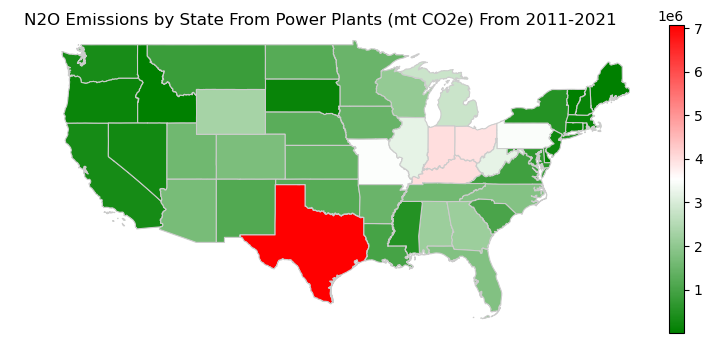

In [36]:
#Plot
minx, miny, maxx, maxy = -130, 24, -67, 50
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_title("N2O Emissions by State From Power Plants (mt CO2e) From 2011-2021")

ax.set_axis_off()

# Customize the map colors and legend
merged_data2.plot(column="Total NO2 Emissions", cmap=c1map, linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
# Show the plot
plt.show()

The power plant industry sector is made up of many different plant types.

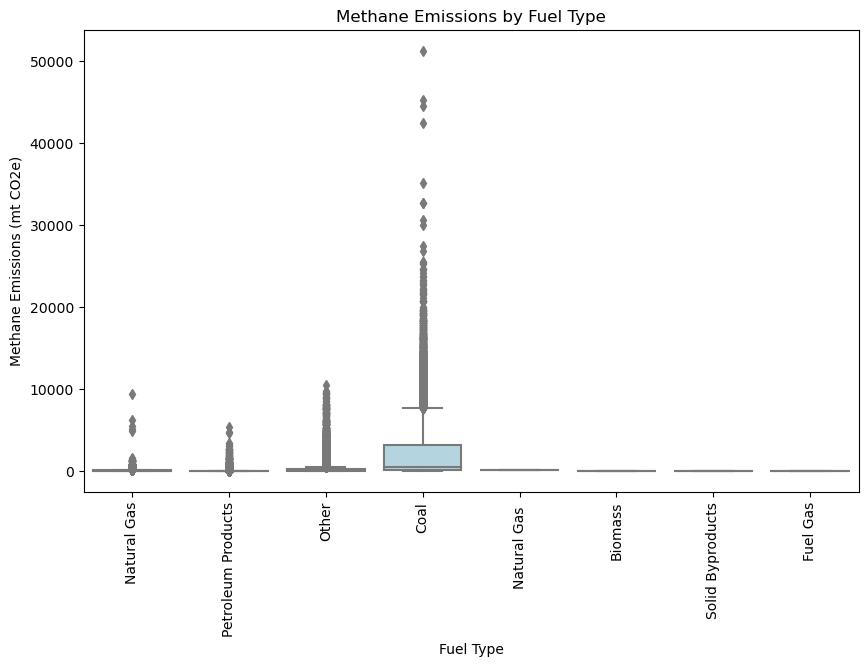

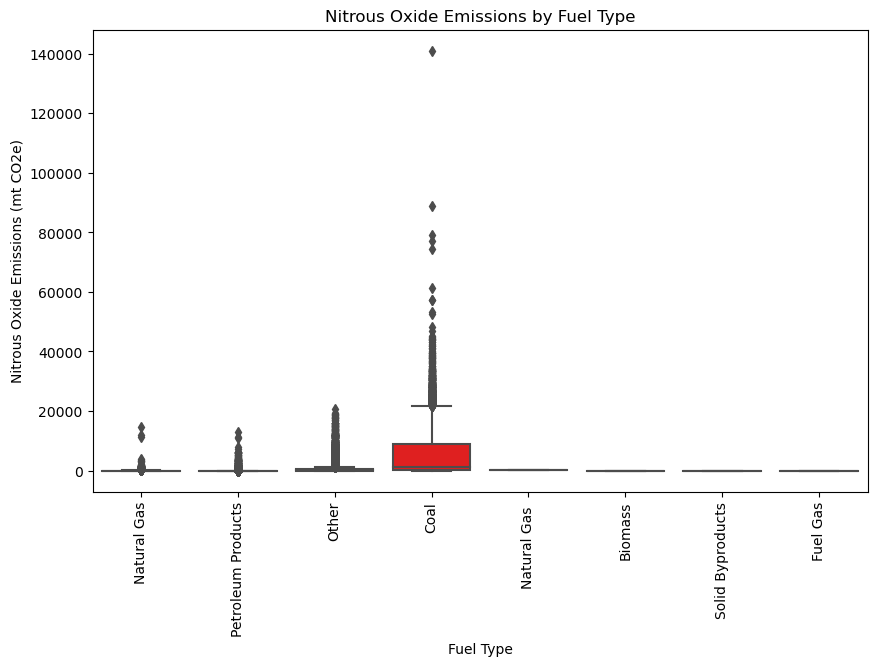

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='General Fuel Type', y='Fuel Methane (CH4) emissions (mt CO2e)', data=data, color='lightblue')
plt.title('Methane Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Methane Emissions (mt CO2e)')
plt.xticks(rotation=90)
plt.show()  

plt.figure(figsize=(10, 6))
sns.boxplot(x='General Fuel Type', y='Fuel Nitrous Oxide (N2O) emissions (mt CO2e)', data=data, color='red')
plt.title('Nitrous Oxide Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Nitrous Oxide Emissions (mt CO2e)')
plt.xticks(rotation=90)
plt.show()  

Because coal fired plants have higher emission rates than other plant types, we can focus on coal plants.

In [38]:
# Filtering the DataFrame to only include coal powerplants
df = data[data['General Fuel Type'] == 'Coal']

When plotting the distribution of the relationship between CH4 and N2O emissions from a given facility, you can see the plot follows a very specific distribution. We attemped to use K-means clustering to identify if the 2 different linear relationships could be identified by clusters, but the distinct lines were not clustered separately, as seen below. 

/var/folders/y9/t9s6xp2s1zd4sgrgn98sqzp80000gn/T/ipykernel_33652/1769867316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_code_numeric'] = df['state_code_numeric']
/Users/sydneypeno/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


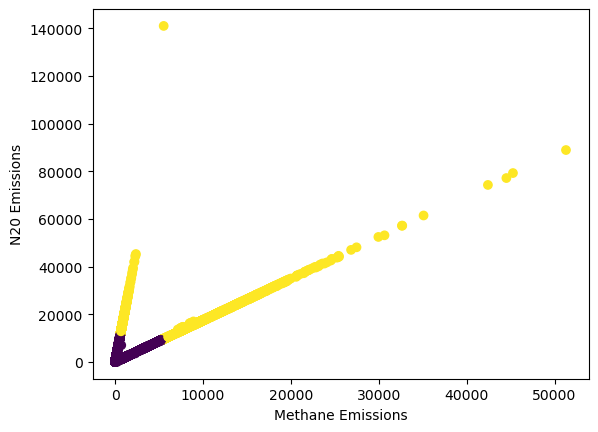

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with methane and n20 emissions columns
data = df[['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']]

# Handle categorical data (for example, state codes)
label_encoder = LabelEncoder()
df['state_code_numeric'] = label_encoder.fit_transform(df['State'])

# Include only numerical columns for clustering
data['state_code_numeric'] = df['state_code_numeric']

# Choose the number of clusters (you can experiment with this)
n_clusters = 2

# Fit KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(data)

# Plot the clusters
plt.scatter(df['Fuel Methane (CH4) emissions (mt CO2e)'], df['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Methane Emissions')
plt.ylabel('N20 Emissions')
plt.show()


In [ ]:
# Any further analysis...